# Churn Prediction

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#setting display options and warnings
warnings.filterwarnings("ignore")
sns.set(color_codes=True)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Loading the dataset
df = pd.read_csv("C:/Users/suyas/Downloads/Sonu/botswana_bank_customer_churn.csv")
print(df.head())

   RowNumber                            CustomerId   Surname First Name  \
0          1  83ef0b54-35f6-4f84-af58-5653ac0c0dc4     Smith       Troy   
1          2  009f115a-e5ca-4cf4-97d6-530140545e4e  Sullivan    Katrina   
2          3  66309fd3-5009-44d3-a3f7-1657c869d573    Fuller      Henry   
3          4  b02a30df-1a5f-4087-8075-2a35432da641     Young    Antonio   
4          5  0d932e5b-bb3a-4104-8c83-f84270f7f2ea  Andersen       John   

  Date of Birth  Gender Marital Status  Number of Dependents  \
0    1987-08-29    Male       Divorced                     3   
1    2000-02-07  Female        Married                     1   
2    1954-02-03  Female         Single                     1   
3    1991-01-15  Female       Divorced                     5   
4    1992-04-08  Female       Divorced                     2   

                        Occupation    Income  ...  \
0      Information systems manager  77710.14  ...   
1               Charity fundraiser  58209.87  ...   
2  Te

In [3]:
print(df.shape)

(115640, 25)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115640 entries, 0 to 115639
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   RowNumber                        115640 non-null  int64  
 1   CustomerId                       115640 non-null  object 
 2   Surname                          115640 non-null  object 
 3   First Name                       115640 non-null  object 
 4   Date of Birth                    115640 non-null  object 
 5   Gender                           115640 non-null  object 
 6   Marital Status                   115640 non-null  object 
 7   Number of Dependents             115640 non-null  int64  
 8   Occupation                       115640 non-null  object 
 9   Income                           115640 non-null  float64
 10  Education Level                  115640 non-null  object 
 11  Address                          115640 non-null  object 
 12  Co

In [5]:
print(df.describe())

           RowNumber  Number of Dependents         Income  Customer Tenure  \
count  115640.000000         115640.000000  115640.000000    115640.000000   
mean    57820.500000              2.502923   52641.363046        15.490591   
std     33382.536902              1.707249   27429.756390         8.654217   
min         1.000000              0.000000    5000.960000         1.000000   
25%     28910.750000              1.000000   28857.070000         8.000000   
50%     57820.500000              3.000000   52658.110000        15.000000   
75%     86730.250000              4.000000   76364.157500        23.000000   
max    115640.000000              5.000000   99999.510000        30.000000   

        Credit Score  Credit History Length  Outstanding Loans     Churn Flag  \
count  115640.000000          115640.000000      115640.000000  115640.000000   
mean      574.299775              15.546602       25502.731792       0.121878   
std       159.067499               8.654630       1412

In [6]:
print("No. of duplicate rows:",df.duplicated().sum())

No. of duplicate rows: 0


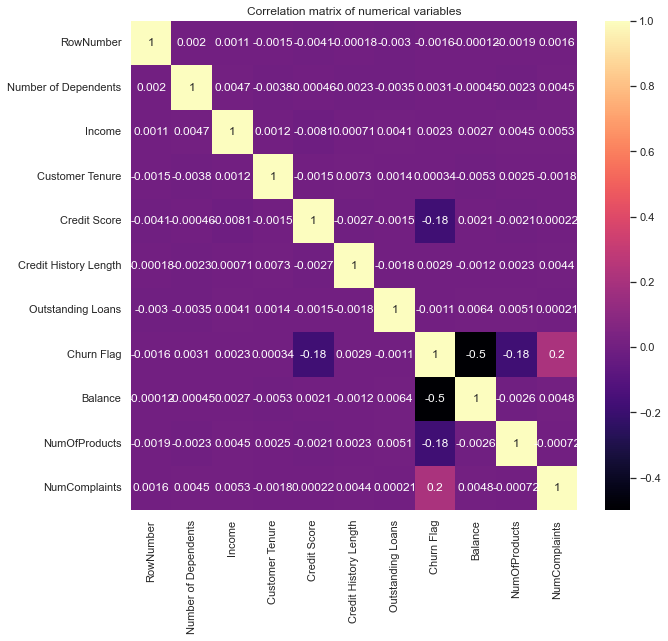

In [7]:
#Correlation Matrix
plt.figure(figsize=(10,9))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='magma')
plt.title('Correlation matrix of numerical variables')
plt.show()

In [8]:
#Convert 'churn flag' to a categorical variable
df['Churn Flag'] = df['Churn Flag'].astype(int)

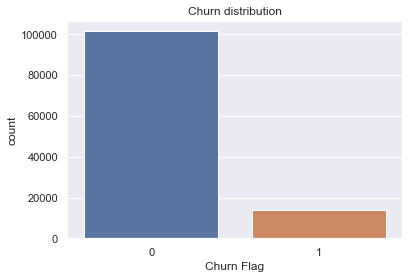

In [9]:
#Visualize the target variable 'Churn Flag' (0=not churn, 1=churn)
plt.figure(figsize=(6,4))
sns.countplot(x='Churn Flag', data=df)
plt.title("Churn distribution")
plt.show()

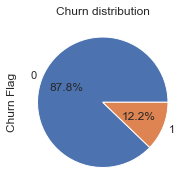

In [10]:
#Pie chart for churn distribution
plt.figure(figsize=(5,3))
df['Churn Flag'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Churn distribution')
plt.show()

In [11]:
#conveting 'Gender' and 'Marital Status' to numerical values using label encoding
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
df['Marital status'] = df['Marital Status'].map({'Married':1, 'Single':0, 'Divorced':2, 'Widowed':3})

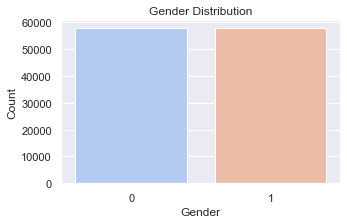

   Gender  Count
0       0  57830
1       1  57810


In [12]:
#Gender Distribution
gender_count = df.groupby('Gender').size().reset_index(name='Count')
plt.figure(figsize=(5,3))
sns.barplot(x='Gender', y='Count', data=gender_count, palette='coolwarm')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
print(gender_count)

In [ ]:

# Customer Segment Distribution
plt.figure(figsize=(8, 3))
df['Customer Segment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Customer Segment distribution')
plt.show()

In [ ]:
#Churn Rate by Gender
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Gender', hue='Churn Flag', palette='viridis')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
#churn Ratee by Marital Status
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Marital Status', hue='Churn Flag', palette='Set1')
plt.title('Churn Rate by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

In [ ]:
#Cheching for missing values
print("Missing values in each column:\n", df.isnull().sum())

In [ ]:
# Convert Date columns to datetime and create 'Age' feature
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])
df['Churn Date'] = pd.to_datetime(df['Churn Date'], errors='coerce')
df['Age'] = pd.Timestamp.now().year - df['Date of Birth'].dt.year

In [ ]:
# Convert Date columns to datetime and create 'Age' feature
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])
df['Churn Date'] = pd.to_datetime(df['Churn Date'], errors='coerce')
df['Age'] = pd.Timestamp.now().year - df['Date of Birth'].dt.year

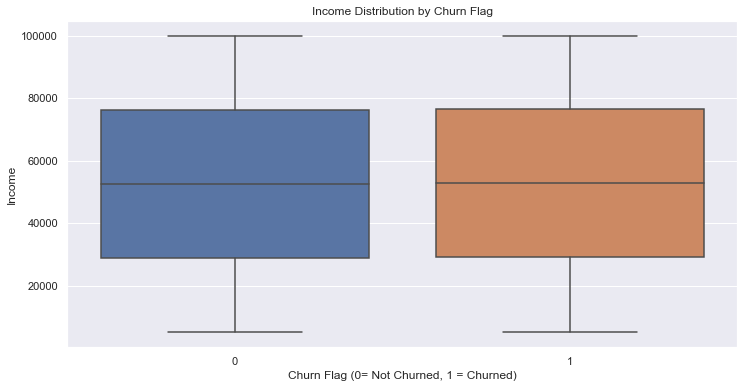

In [41]:
#Boxplot of income by churn flag
plt.figure(figsize=(12,6))
sns.boxplot(x='Churn Flag', y='Income', data=df)
plt.title('Income Distribution by Churn Flag')
plt.xlabel('Churn Flag (0= Not Churned, 1 = Churned)')
plt.ylabel('Income')
plt.show()

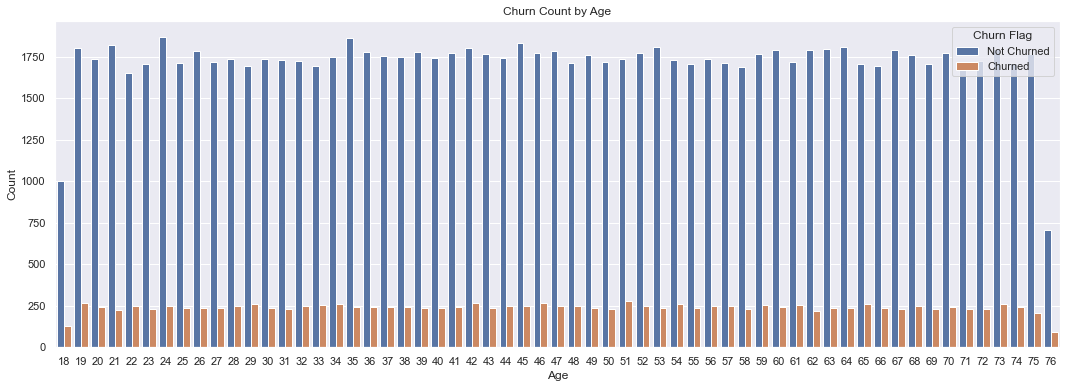

In [44]:
#Age and Churn Flag
plt.figure(figsize=(18,6))
sns.countplot(x='Age', hue='Churn Flag', data=df)
plt.title('Churn Count by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Churn Flag', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

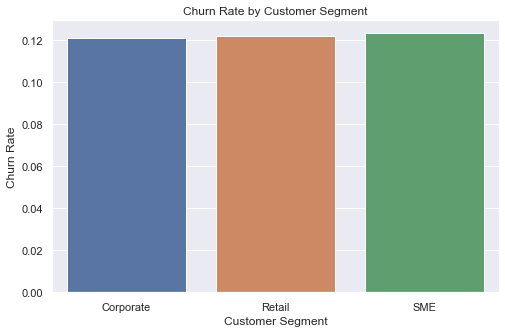

  Customer Segment  Churn Rate
0        Corporate    0.121043
1           Retail    0.121555
2              SME    0.123024


In [46]:

# Churn Rate by Customer Segment
churn_rate_segment = df.groupby('Customer Segment')['Churn Flag'].mean().reset_index()
churn_rate_segment.columns = ['Customer Segment', 'Churn Rate']
plt.figure(figsize=(8, 5))
sns.barplot(x='Customer Segment', y='Churn Rate', data=churn_rate_segment)
plt.title('Churn Rate by Customer Segment')
plt.ylabel('Churn Rate')
plt.xlabel('Customer Segment')
plt.show()
print(churn_rate_segment)